# Logestic Regression

In [1]:
pip install scikit-learn==0.23.1

  Using cached scikit-learn-0.23.1.tar.gz (7.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Mohammad\anaconda3\python.exe' 'C:\Users\Mohammad\AppData\Local\Temp\pip-standalone-pip-2a_ftq5f\__env_pip__.zip\pip' install --ignore-installed --no-user --prefix 'C:\Users\Mohammad\AppData\Local\Temp\pip-build-env-1a63ho_d\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel 'Cython>=0.28.5' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation == '"'"'CPython'"'"'' 'numpy==1.14.0; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation != '"'"'CPython'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.7'"'

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

      Running setup.py install for numpy: finished with status 'error'
      ERROR: Command errored out with exit status 1:
       command: 'C:\Users\Mohammad\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Mohammad\\AppData\\Local\\Temp\\pip-install-tdfgn58q\\numpy_46d644f39a314532a28232e5fe2e8095\\setup.py'"'"'; __file__='"'"'C:\\Users\\Mohammad\\AppData\\Local\\Temp\\pip-install-tdfgn58q\\numpy_46d644f39a314532a28232e5fe2e8095\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\Mohammad\AppData\Local\Temp\pip-record-anu3rbe5\install-record.txt' --single-version-externally-managed --prefix 'C:\Users\Mohammad\AppData\Local\Temp\pip-build-env-1a63ho_d\overlay' --compile --install-headers '

In [3]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe

<bound method NDFrame.describe of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  

In [6]:
df.shape

(303, 14)

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

# حالا بیایم ایکس و ایگرگ رو از هم جدا کنیم واسه ترین کردن
## تکرار میشه که با پانداز خوندیم اما موقع کار کردن و استفاده از سایکیت لرن باید بریم سراغ نامپای 

In [10]:
X = np.asarray(df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']])
X[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [11]:
y = np.asarray(df['output'])
y [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

# حالا میایم داده ها رو روی منحنی نرمال استاندارد نرمالیزه می کنیم

In [12]:
# برای اینکه تفاوت ها رو ببینی هم اعداد واقعی رو پرینت کردم هم اعداد نرمالایز شده رو
print(X[0:2])
scaler = preprocessing.StandardScaler().fit(X)
X=scaler.transform(X.astype(float))
print(X[0:2])

[[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1. ]
 [ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
    2. ]]
[[ 0.9521966   0.68100522  1.97312292  0.76395577 -0.25633371  2.394438
  -1.00583187  0.01544279 -0.69663055  1.08733806 -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 -0.09273778  0.07219949 -0.41763453
   0.89896224  1.63347147 -0.69663055  2.12257273 -2.27457861 -0.71442887
  -0.51292188]]


# Train/Test dataset
## We split our dataset into train and test set:

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


## Modeling (Logistic Regression with Scikit-learn)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

## الان مدل ما ترین شده و میتونیم شروع کنیم به پیش بینی کردن

In [15]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

## واسه اینکه بتونیم مقایسه چشمی کنیم بین مقادیر پیش بینی شده و مقادیر واقعی هم میتونیم جفتشون رو پرینت کنیم

In [16]:
print(yhat)
print(y_test)

[1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1]
[1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1]


In [22]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.38, 0.62],
       [0.72, 0.28],
       [0.4 , 0.6 ],
       [0.19, 0.81],
       [0.4 , 0.6 ],
       [0.5 , 0.5 ],
       [0.63, 0.37],
       [0.23, 0.77],
       [0.49, 0.51],
       [0.37, 0.63],
       [0.43, 0.57],
       [0.2 , 0.8 ],
       [0.39, 0.61],
       [0.57, 0.43],
       [0.33, 0.67],
       [0.86, 0.14],
       [0.29, 0.71],
       [0.29, 0.71],
       [0.68, 0.32],
       [0.46, 0.54],
       [0.24, 0.76],
       [0.39, 0.61],
       [0.81, 0.19],
       [0.46, 0.54],
       [0.45, 0.55],
       [0.75, 0.25],
       [0.59, 0.41],
       [0.23, 0.77],
       [0.44, 0.56],
       [0.81, 0.19],
       [0.58, 0.42],
       [0.5 , 0.5 ],
       [0.19, 0.81],
       [0.36, 0.64],
       [0.43, 0.57],
       [0.25, 0.75],
       [0.25, 0.75],
       [0.41, 0.59],
       [0.48, 0.52],
       [0.83, 0.17],
       [0.8 , 0.2 ],
       [0.69, 0.31],
       [0.72, 0.28],
       [0.4 , 0.6 ],
       [0.26, 0.74],
       [0.41, 0.59],
       [0.74, 0.26],
       [0.53,

# Evaluation
* اینجا از ایندکس ژاکار استفاده میکنیم برای ارزیابی

In [17]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.75

# confusion matrix
* اینجا فاکشنی که مربوط به رسم ماتریس کانفیوژن داریم رو کپی پیست میکنیم

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[33  3]
 [ 4 21]]


Confusion matrix, without normalization
[[33  3]
 [ 4 21]]


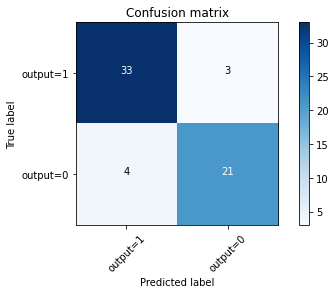

In [19]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0]) 
np.set_printoptions(precision=2) 


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

In [20]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.89      0.92      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.88      0.89      0.88        61



In [23]:
# میتونیم ارزیابی مدل رو با لاگ لاس انجام بدیم
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4363789674264379